#### **Análise exploratória de dados - Empresas de Recife**
*Autor: Vinícius Raony*  

---

# Analisando empresas da cidade do Recife

A análise dos dados das empresas ativas pode revelar informações sobre o atual cenário econômico da cidade, os setores que estão prosperando e as áreas onde essas empresas estão concentradas. Por outro lado, a análise das empresas inativas pode lançar luz sobre os desafios enfrentados pelas empresas e os setores que podem estar em declínio.

Nesta análise, irei explorar dois conjuntos de dados - um contendo informações sobre as empresas ativas e outro sobre as empresas inativas. Ao comparar e contrastar esses dois conjuntos de dados, podemos obter insights valiosos sobre o ambiente empresarial na cidade do Recife.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/ViniciusRaony/analisando-dados-empresas-recife/main/images/img_introducao.jpg"></center>

Através desta análise, espero contribuir para uma melhor compreensão do panorama empresarial na cidade do Recife.

**Neste *notebook*, irei analisar os dados referentes às empresas ativas e inativas da cidade do Recife, e ver quais insights podem ser extraídos a partir desses dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site da Prefeitura do Recife, que consta [neste meu link](http://dados.recife.pe.gov.br/dataset/empresas-da-cidade-do-recife).

Vale ressaltar que as informações sensíveis estão devidamente anonimizadas nos arquivos fornecidos.


**Dicionário das variáveis**

* `cnpj` - Cadastro Nacional de Pessoas Jurídicas
* `cod_empresa` - Código da Empresa critptografado
* `razao_social` - Razão Social da Empresa
* `nome_fantasia` - Nome fantasia da Empresa
* `cod_logradouro` - Identifica as Vias de Circulação do espaço urbano do Recife
* `nome_logradouro` - Identifica as vias de Circulação
* `num_logradouro` - Número do Logradouro
* `cod_bairro` - Código do Bairro na base de empresas
* `nome_bairro` - Bairro da cidade do Recife
* `situacao_empresa` - Situação da empresa
* `data_inicio` - Data inicio da empresa
* `data_encerramento` - Data encerramento da empresa
* `cod_grupo` - Grupo ao qual pertence a atividade principal da empresa
* `nome_grupo` - Nome do grupo ao qual pertence a atividade principal da empresa
* `cnae` - Código Nacional de Atividade Econômica
* `desc_atividade` - Descrição da Atividade Econômica
* `atividade_principal` - É a principal atividade desempenhada pela empresa?
* `atividade_vig_sanitaria` - É a principal atividade da empresa que exige vigilância sanitária do município?
* `atividade_predominante` - É a principal atividade da empresa que é prestadora de serviço?
* `incomodo` - Atividade Potencialmente Geradora de Incômodo?
* `latitude` - coordenada da latitude da empresa
* `longitude` - coordenada da longitude da empresa


## Análise Exploratória dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

Vamos importar os pacotes necessários e iniciar nossa Análise Exploratória.

In [ ]:
# importar os pacotes necessários
!pip install geopandas
import pandas as pd

# clonando repositório onde estão os dados brutos
!mkdir -p data/raw/
!curl https://raw.githubusercontent.com/ViniciusRaony/analisando-dados-empresas-recife/main/raw/empresasativender.csv -o data/raw/empresasativender.csv
!curl https://raw.githubusercontent.com/ViniciusRaony/analisando-dados-empresas-recife/main/raw/empresasinativender.csv -o data/raw/empresasinativender.csv

# definir o valor máximo de colunas como None para exibir todas as colunas
pd.set_option('display.max_columns', None)

In [118]:
# importar o arquivo .csv para seus respectivos DataFrames 'df_empresas_ativas' e 'df_empresas_inativas'
df_empresas_ativas = pd.read_csv('/content/data/raw/empresasativender.csv', encoding='utf-8-sig', delimiter=";")

df_empresas_inativas = pd.read_csv('/content/data/raw/empresasinativender.csv', encoding='utf-8-sig', delimiter=";")


<ipython-input-118-75781c486fd2>:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_empresas_ativas = pd.read_csv('/content/data/raw/empresasativender.csv', encoding='utf-8-sig', delimiter=";")


In [119]:
# concatenando DataFrames
df_empresas = pd.concat([df_empresas_ativas, df_empresas_inativas], ignore_index=True)

Parte importante da análise é descobrir o tamanho do dataset, bem como dados únicos de CNPJ

Vamos verificar:

In [128]:
# verificando quantidade de cnpj unicos
num_unique_cnpj = df_empresas['cnpj'].nunique()
print(f'O número de CNPJs únicos é: {num_unique_cnpj}')

# verificando as dimensões do Dataset
print('Dimensões do Dataset',
    '\nVariáveis: ',df_empresas.shape[1], "\n"
      'Entradas: ', df_empresas.shape[0])

# verificando as primeiras entradas
df_empresas.head(5)

O número de CNPJs únicos é: 204185
Dimensões do Dataset 
Variáveis:  25 
Entradas:  204185


,cnpj,razao_social,nome_fantasia,cod_logradouro,nome_logradouro,numero_residencia,numero_lote,cod_bairro,nome_bairro,situacao_empresa,data_abertura_empresa,data_encerramento,cod_grupo,nome_grupo,cnae,desc_atividade,atividade_principal,atividade_vig_sanitaria,atividade_predominante,incomodo,latitude,longitude,ano_abertura,ano_encerramento,status_empresa
0,50669717000107,ECOSAT LTDA,ECOSAT,9342,Rua Azevedo Cruz,NaN,221,884,COHAB,ATIVO,2023-05-15,NaT,14,CONSERVAÇÃO E LIMPEZA,4321500,INSTALAÇÃO E MANUTENÇÃO ELÉTRICA,S,N,S,N,NaN,NaN,2023,-1,1
4,12859211000163,ASSOCIACAO DE MORADORES DE VILA AEROMOCA,NaN,75078,Rua Aiquara,NaN,25,884,COHAB,ATIVO,1993-04-01,NaT,20,"SERVICOS PUBLICOS, COMUNITARIOS E SOCIAIS",9430800,ATIVIDADES DE ASSOCIAÇÕES DE DEFESA DE DIREITO...,S,N,S,N,NaN,NaN,1993,-1,1
5,23942081000144,L C GOMES DA SILVA SERVICOS EM TECNOLOGIA - ME,L C GOMES DA SILVA SUPORTE TECNICO E OUTROS SE...,40207,Rua Cônego Luiz Vieira,NaN,71,884,COHAB,ATIVO,2016-01-11,NaT,23,SERVICOS DE INFORMATICA,6201501,Desenvolvimento de programas de computador sob...,N,N,N,N,NaN,NaN,2016,-1,1
8,15165435000163,R C DOS SANTOS TELECOMUNICACOES,IGUANANET,20133,Rua Domingos Antônio Jorge,NaN,83,884,COHAB,ATIVO,2012-03-09,NaT,11,"FOTOGRAFICO, CINEMATOGRAFICO, REPROGRAFICO",1813001,IMPRESSÃO DE MATERIAL PARA USO PUBLICITÁRIO,N,N,N,S,NaN,NaN,2012,-1,1
15,30577078000134,RF COMERCIO DE EQUIPAMENTOS DE TELEFONIA LTDA,NaN,56707,Rua Raposo Tavares,NaN,88,884,COHAB,ATIVO,2018-05-29,NaT,26,OUTRAS ATIVIDADES VAREJISTAS,4752100,COMÉRCIO VAREJISTA ESPECIALIZADO DE EQUIPAMENT...,S,N,N,N,NaN,NaN,2018,-1,1


Outro detalhe importante que precisamos verificar e garantir que estão da forma que precisamos é o tipo das variáveis. Para isso, utilizaremos o método dtypes.

In [123]:
# analisando dos tipos existentes no DataFrame
print(df_empresas.dtypes)

cnpj                        object
razao_social                object
nome_fantasia               object
cod_logradouro               int64
nome_logradouro             object
numero_residencia           object
numero_lote                 object
cod_bairro                   int64
nome_bairro                 object
situacao_empresa            object
data_abertura_empresa       object
data_encerramento           object
cod_grupo                    int64
nome_grupo                  object
cnae                         int64
desc_atividade              object
atividade_principal         object
atividade_vig_sanitaria     object
atividade_predominante      object
incomodo                    object
latitude                   float64
longitude                  float64
dtype: object


Outro detalhe importante é a verificação em relação aos dados ausentes.

Para isso, é importante verificar a fonte dos dados, entender a coleta deles, verificar a aleatoriedade dessa ausência, etc.

In [124]:
# verificando dados ausentes
round((df_empresas.isnull().sum() / df_empresas.shape[0]).sort_values(ascending=False),2)

data_encerramento          0.87
numero_residencia          0.50
nome_fantasia              0.27
latitude                   0.11
longitude                  0.11
nome_logradouro            0.00
cnae                       0.00
cod_logradouro             0.00
incomodo                   0.00
atividade_predominante     0.00
atividade_vig_sanitaria    0.00
atividade_principal        0.00
desc_atividade             0.00
nome_grupo                 0.00
numero_lote                0.00
cod_grupo                  0.00
razao_social               0.00
data_abertura_empresa      0.00
situacao_empresa           0.00
nome_bairro                0.00
cod_bairro                 0.00
cnpj                       0.00
dtype: float64

A coluna date não está em formato datetime. Para que essa coluna possa ser explorada ao máximo, vamos transformá-la para o formato datetime.

Observação: Como verifiquei que o quantitativo de datas com erro eram verificáveis e tratáveis, optei por substituí-las.

In [125]:
# tratando colunas com erro da data 'data_abertura_empresa' e 'data_encerramento'
df_empresas['data_abertura_empresa'] = df_empresas['data_abertura_empresa'].str.replace('205', '2005')
df_empresas['data_encerramento'] = df_empresas['data_encerramento'].replace('2915-01-19', '2015-01-19')

# convertendo as colunas para datetime
df_empresas['data_abertura_empresa'] = pd.to_datetime(df_empresas['data_abertura_empresa'])
df_empresas['data_encerramento'] = pd.to_datetime(df_empresas['data_encerramento'])

Podemos enriquecer os dados para uma análise que proporcione gerar gráficos e trabalhar com classificação, para isso faremos:
* criar coluna ano_abertura;
* criar coluna ano_encerramento;
* criar coluna status_empresa, onde ATIVO = 1, caso nao seja teremos 0.

In [126]:
# criando colunar ano_abertura e ano_encerramento
df_empresas['ano_abertura'] = df_empresas['data_abertura_empresa'].dt.year

df_empresas['ano_encerramento'] = df_empresas['data_encerramento'].dt.year

df_empresas['ano_encerramento'] = df_empresas['ano_encerramento'].fillna(-1).astype(int) # Substituindo para int, pois está como float

# criando coluna status_empresa
df_empresas['status_empresa'] = df_empresas['situacao_empresa'].apply(lambda x: 1 if x == 'ATIVO' else 0)


Foi observado que há uma duplicidade de CNPJ no DataFrame, pois uma empresa pode ter vários CNAEs, como estamos analisando o grão CNPJ optei por retirar as duplicidades e cosodierar atividade_principal = 'S' como sendo , assim teremos a principal atividade executada pela empresa em questão.

In [127]:
# ordenar o DataFrame para que as linhas onde 'atividade_principal' é 'S' apareçam primeiro
df_empresas_inativas = df_empresas.sort_values('atividade_principal', ascending=False)

# remover duplicatas com base na coluna 'cnpj', mantendo a primeira ocorrência (que será a linha onde 'atividade_principal' é 'S')
df_empresas = df_empresas.drop_duplicates(subset='cnpj', keep='first')

## Plotando gráficos de insights

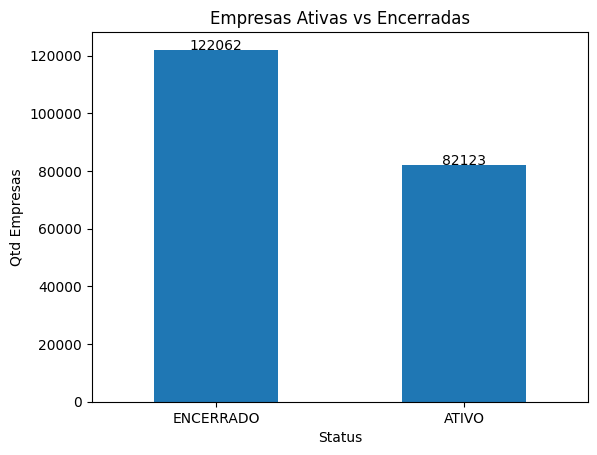

In [133]:
import matplotlib.pyplot as plt

# contar o número de empresas ativas e encerradas
contagem_status = df_empresas['status_empresa'].value_counts()

# criar o gráfico de barras
ax = contagem_status.plot(kind='bar')

# adicionar título e rótulos aos eixos
plt.title('Empresas Ativas vs Encerradas')
plt.xlabel('Status')
plt.ylabel('Qtd Empresas')

# alterar os rótulos do eixo x e colocando na horizontal
ax.set_xticklabels(['ENCERRADO', 'ATIVO'], rotation = 0)

# adicionar a quantidade de valores no gráfico
for i, v in enumerate(contagem_status):
    ax.text(i, v + 50, str(v), ha='center')

plt.show()

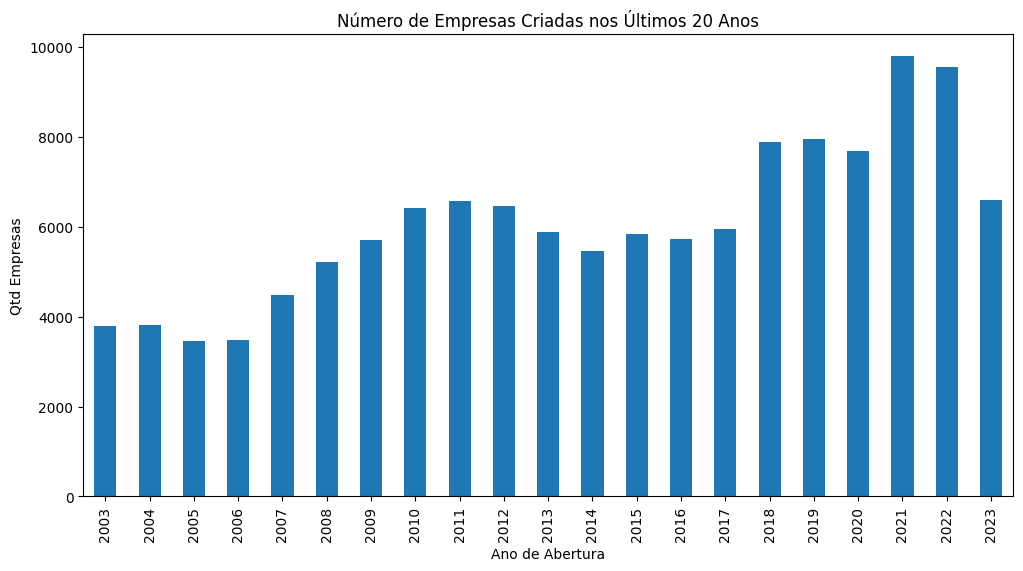

In [135]:
# obter o ano atual
ano_atual = pd.to_datetime('today').year

# filtrar o DataFrame para incluir apenas os últimos 20 anos
df_empresas_recentes = df_empresas[df_empresas['ano_abertura'] >= (ano_atual - 20)]

# contar o número de empresas criadas em cada ano
contagem_empresas_por_ano = df_empresas_recentes['ano_abertura'].value_counts().sort_index()

# criar o gráfico de barras
ax = contagem_empresas_por_ano.plot(kind='bar', figsize=(12, 6))

# adicionar título e rótulos aos eixos
plt.title('Número de Empresas Criadas nos Últimos 20 Anos')
plt.xlabel('Ano de Abertura')
plt.ylabel('Qtd Empresas')

plt.show()

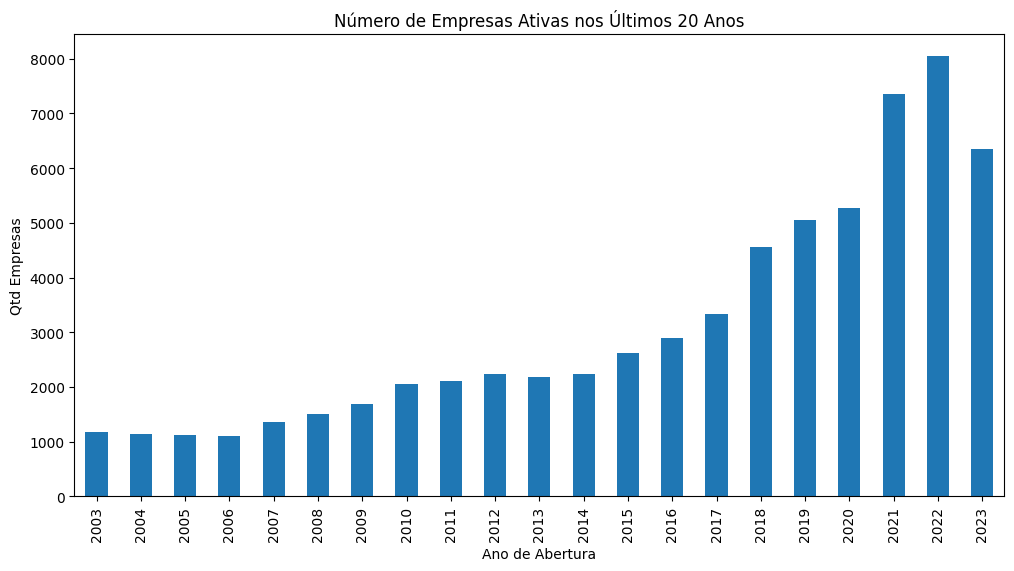

In [142]:
# obter o ano atual
ano_atual = pd.to_datetime('today').year

# filtrar o DataFrame para incluir apenas os últimos 20 anos e onde 'empresa_status' é 1
df_empresas_recentes = df_empresas[(df_empresas['ano_abertura'] >= (ano_atual - 20)) & (df_empresas['status_empresa'] == 1)]

# contar o número de empresas criadas em cada ano
contagem_empresas_por_ano = df_empresas_recentes['ano_abertura'].value_counts().sort_index()

# criar o gráfico de barras
ax = contagem_empresas_por_ano.plot(kind='bar', figsize=(12, 6))

# adicionar título e rótulos aos eixos
plt.title('Número de Empresas Ativas nos Últimos 20 Anos')
plt.xlabel('Ano de Abertura')
plt.ylabel('Qtd Empresas')

plt.show()


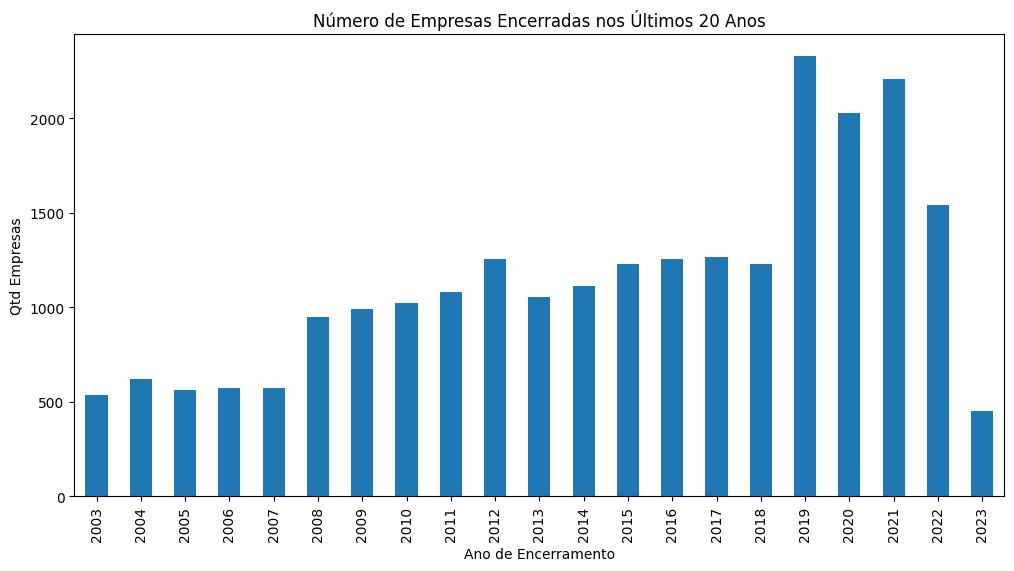

In [144]:
# obter o ano atual
ano_atual = pd.to_datetime('today').year

# filtrar o DataFrame para incluir apenas os últimos 20 anos e onde 'empresa_status' é 0
df_empresas_recentes = df_empresas[(df_empresas['ano_encerramento'] >= (ano_atual - 20)) & (df_empresas['status_empresa'] == 0)]

# contar o número de empresas criadas em cada ano
contagem_empresas_por_ano = df_empresas_recentes['ano_encerramento'].value_counts().sort_index()

# criar o gráfico de barras
ax = contagem_empresas_por_ano.plot(kind='bar', figsize=(12, 6))

# adicionar título e rótulos aos eixos
plt.title('Número de Empresas Encerradas nos Últimos 20 Anos')
plt.xlabel('Ano de Encerramento')
plt.ylabel('Qtd Empresas')

plt.show()

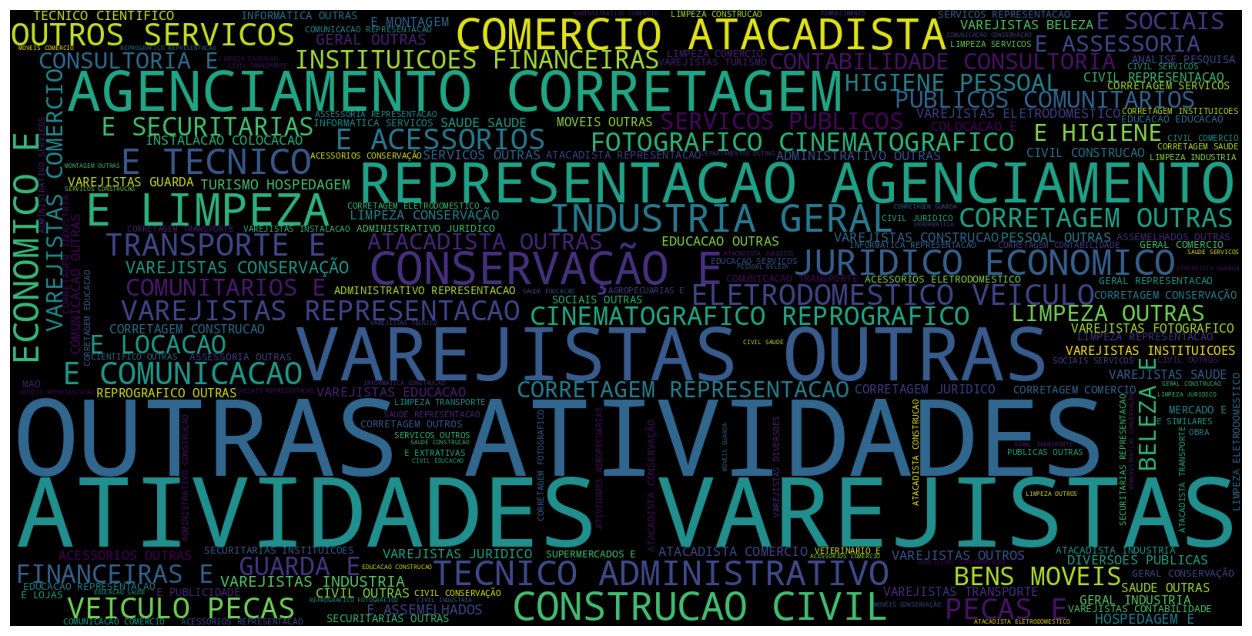

In [139]:
# wordcloud com as atividades de empresas inativas, objetivando visualizar os grupos mais impactados pelo encerramento
from wordcloud import WordCloud, STOPWORDS

# filtrar o dataframe para incluir apenas as linhas onde status_empresa' é 0, ou seja, empresas inativas
df_empresas_filtrado = df_empresas[df_empresas['status_empresa'] == 0]

# agrupar todas as frases em uma única string
all_nome_grupo = " ".join(s for s in df_empresas_filtrado['nome_grupo'])

# lista de stopwords
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os"])

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_nome_grupo)

# plotando imagem
fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)

wordcloud.to_file("nome_grupo_wordcloud.png")

